In [1]:
import numpy as np
import matplotlib.pyplot as plt

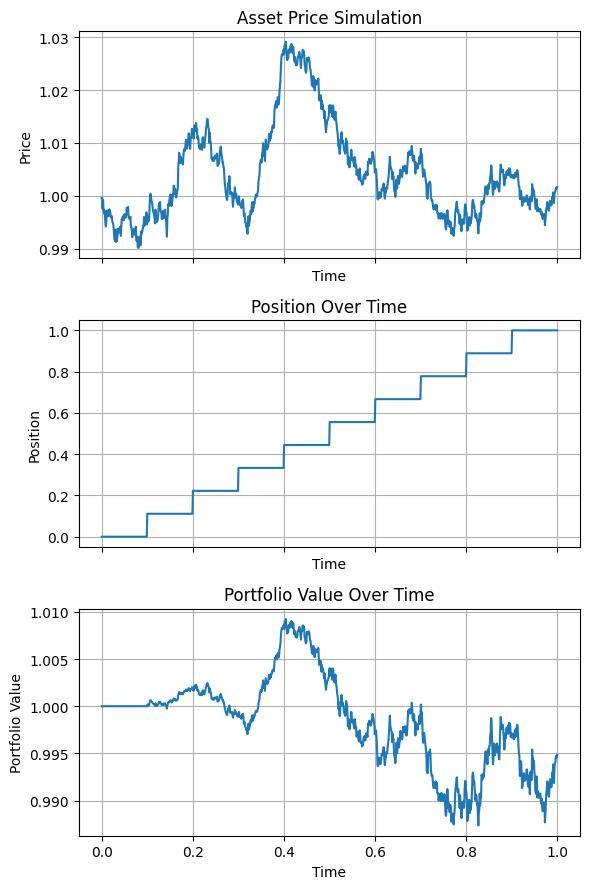

In [2]:
np.random.seed(2)

returns = np.random.normal(loc=5e-5, scale=1e-3, size=1000)
cumulative_returns = np.cumprod(1 + returns)
fig, (stock_ax, pos_ax, pf_ax) = plt.subplots(3, 1, sharex=True, figsize=(6, 9))
x = np.linspace(0, 1, 1000)
stock_ax.plot(x, cumulative_returns)
stock_ax.grid()
stock_ax.set_xlabel("Time")
stock_ax.set_ylabel("Price")
stock_ax.set_title("Asset Price Simulation")


pos = np.zeros_like(x)
for i in range(1, 11):
    pos += x > i * 0.1
pos = pos.astype(float)
pos /= pos.max()
pos_ax.plot(x, pos)
pos_ax.grid()
pos_ax.set_xlabel("Time")
pos_ax.set_ylabel("Position")
pos_ax.set_title("Position Over Time")

pf_returns = pos * returns
pf_cumulative_returns = np.cumprod(1 + pf_returns)
pf_ax.plot(x, pf_cumulative_returns)
pf_ax.grid()
pf_ax.set_xlabel("Time")
pf_ax.set_ylabel("Portfolio Value")
pf_ax.set_title("Portfolio Value Over Time")

plt.tight_layout()

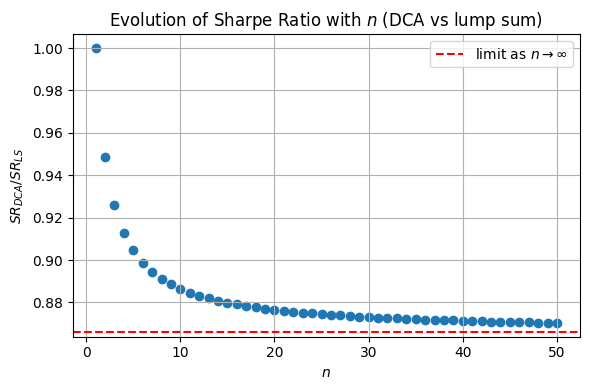

In [3]:
def SR(n):
    mu = (n + 1) / (2 * n)
    sigma = np.sqrt((n + 1) * (2 * n + 1) / (6 * n**2))
    return mu / sigma

n_values = np.arange(1, 51)
sharpe_ratios = SR(n_values)
plt.figure(figsize=(6, 4))
plt.scatter(n_values, sharpe_ratios)
plt.axhline(y=np.sqrt(3) / 2, color="red", linestyle="--", label="limit as $n \\to \\infty$")
plt.xlabel("$n$")
plt.ylabel("$SR_{DCA} / SR_{LS}$")
plt.title("Evolution of Sharpe Ratio with $n$ (DCA vs lump sum)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()